Using free and open source tools, provide a set of choropleth visualizations for each of the columns containing dates such that the resulting visualizations (48 states only) tell the story by conveying through color, texture, or both the time lines of achievement of each milestone/column in the provided dataset. Missing data are of particular interest in that when a state has never achieved a given milestone, that should be indicated in a standout manner such as cross-hatching. Consider that the publication may be grayscale. 

Provide a solution for that as well. 
Provide the titles, labels, and legends necessary for clarification. 

File support is given as follows: SturmCodebook has the explanation. SturmData is the data CSV. 

In [6]:
import json
import folium
import pandas as pd
import numpy as np

import geopandas as gpd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('/Users/kaylakight/Downloads/SturmData.csv')

In [9]:
df.head(10)

,state,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
0,AL,1,41,1846.0,NaN,1887.0,NaN,NaN
1,AR,5,42,1835.0,1873.0,1873.0,1868.0,1868.0
2,AZ,4,61,1864.0,1871.0,1973.0,NaN,1871.0
3,CA,6,71,1850.0,1872.0,1872.0,1874.0,1872.0
4,CO,8,62,1861.0,1861.0,1861.0,1874.0,1874.0
5,CT,9,1,1845.0,1877.0,1877.0,1809.0,1877.0
6,DE,10,11,1865.0,1873.0,1873.0,NaN,NaN
7,FL,12,43,1845.0,1943.0,1892.0,1823.0,NaN
8,GA,13,44,1868.0,1873.0,1861.0,1867.0,NaN
9,IA,19,31,1846.0,1873.0,1873.0,NaN,1873.0


In [10]:
df.dtypes

state             object
fips               int64
icpsr              int64
debtfree         float64
effectivemwpa    float64
earnings         float64
wills            float64
soletrader       float64
dtype: object

In [19]:
states = gpd.read_file('/Users/kaylakight/Downloads/archive/us-states.json')

print(states.columns)
states.head()

Index(['id', 'name', 'geometry'], dtype='object')


,id,name,geometry
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691..."
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3..."
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496..."
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0..."


In [20]:
merged = states.set_index('id').join(df.set_index('state'), how='inner')


In [21]:
merged.head(10)

,name,geometry,fips,icpsr,debtfree,effectivemwpa,earnings,wills,soletrader
AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",1,41,1846.0,NaN,1887.0,NaN,NaN
AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",4,61,1864.0,1871.0,1973.0,NaN,1871.0
AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",5,42,1835.0,1873.0,1873.0,1868.0,1868.0
CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",6,71,1850.0,1872.0,1872.0,1874.0,1872.0
CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",8,62,1861.0,1861.0,1861.0,1874.0,1874.0
CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",9,1,1845.0,1877.0,1877.0,1809.0,1877.0
DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",10,11,1865.0,1873.0,1873.0,NaN,NaN
FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",12,43,1845.0,1943.0,1892.0,1823.0,NaN
GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",13,44,1868.0,1873.0,1861.0,1867.0,NaN
ID,Idaho,"POLYGON ((-116.04751 49.00024, -116.04751 47.9...",16,63,1887.0,1903.0,1915.0,1887.0,1887.0


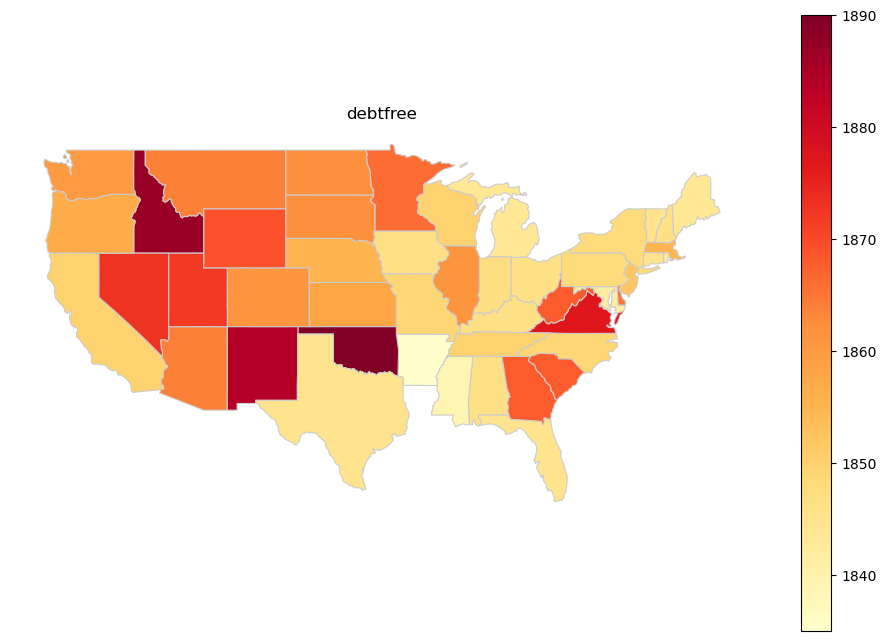

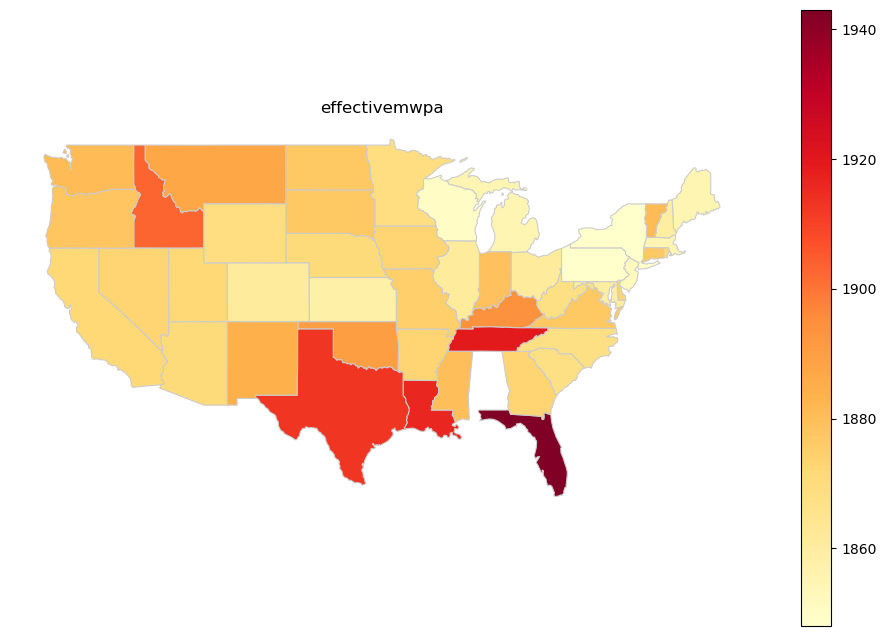

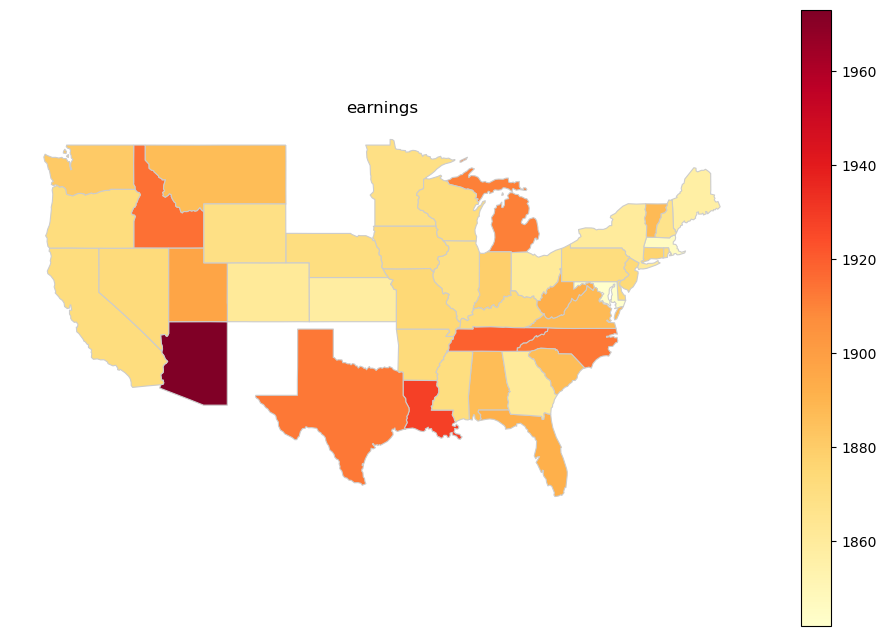

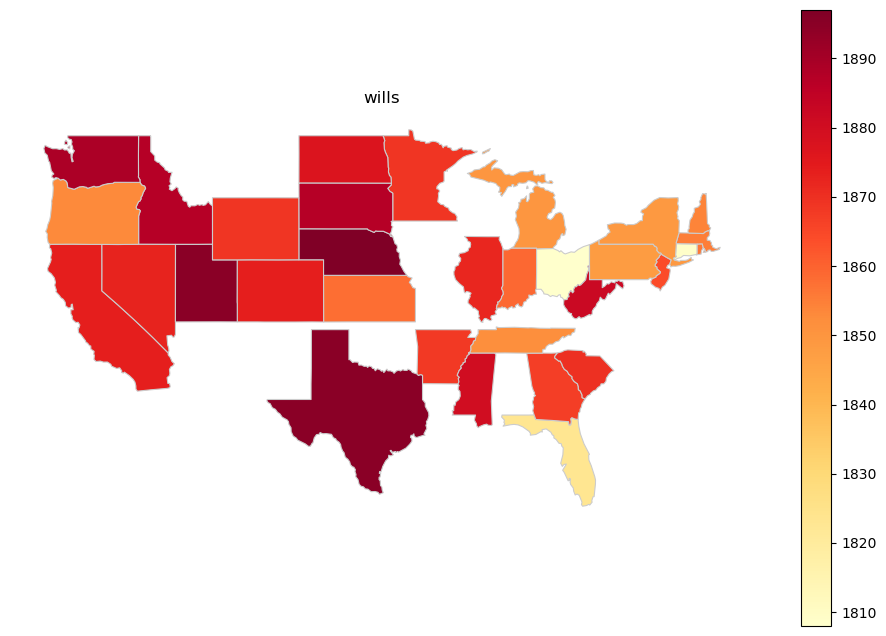

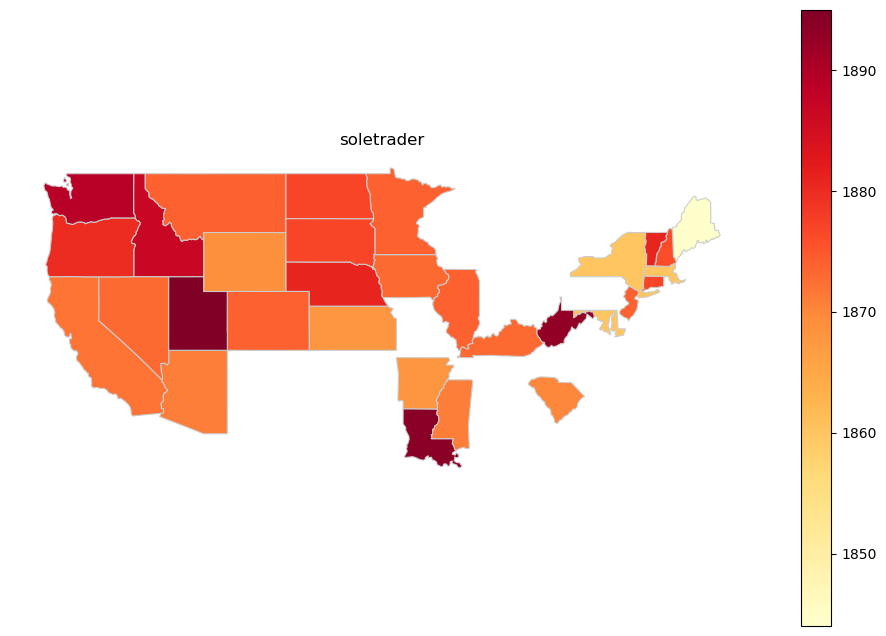

In [22]:
columns = ['debtfree', 'effectivemwpa', 'earnings', 'wills', 'soletrader']

for column in columns:
    fig, ax = plt.subplots(figsize=(12, 8))
    merged.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(column)
    ax.axis('off')
    plt.show()

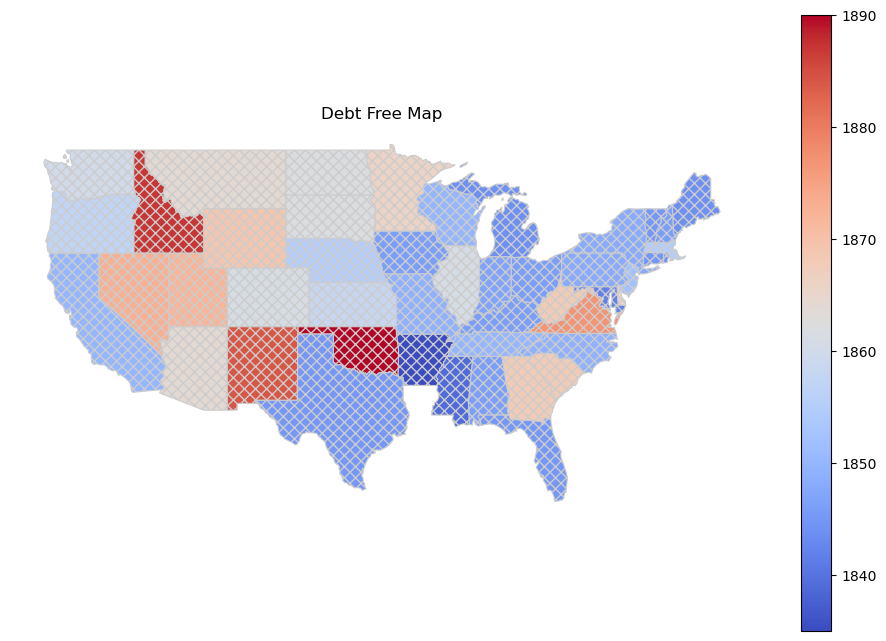

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

texture_pattern = 'xxx' 

merged.plot(column='debtfree', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, hatch=texture_pattern)

ax.set_title('Debt Free Map')
ax.axis('off')
plt.show()

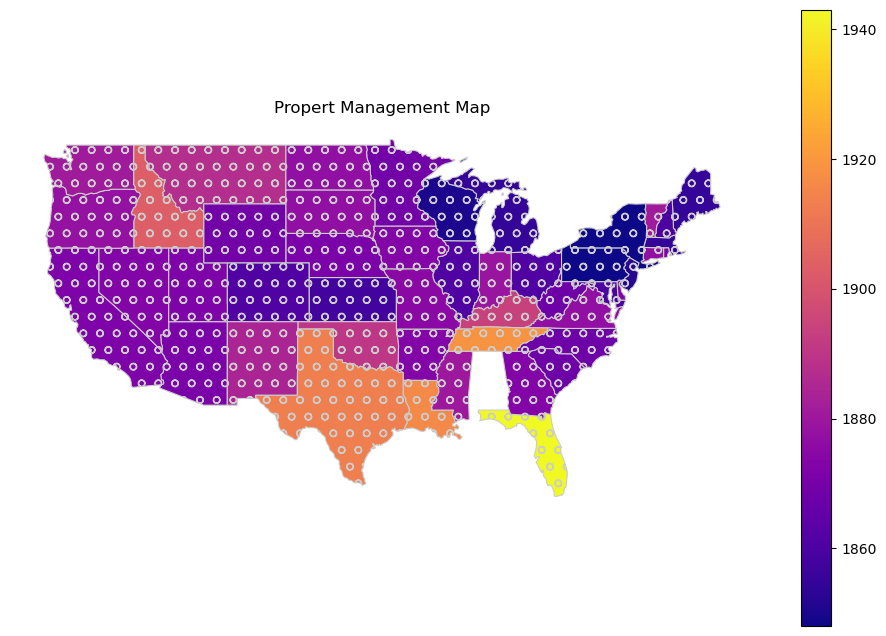

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))

merged.plot(column='effectivemwpa', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, hatch='o')

ax.set_title('Propert Management Map')
ax.axis('off')
plt.show()